In [1]:
using LinearAlgebra

In [2]:
A = rand(4,4)
typeof(A)

Array{Float64,2}

In [3]:
Array{Float64, 2} === Matrix{Float64} # equivalent not just equal

true

In [4]:
println(det(A))
println(inv(A))
println(rank(A))

-0.0664341874130821
[0.2645194703872127 -1.9486419278876437 -1.4912241850292283 2.915176403491686; -1.6930555951218036 -2.51213263812082 2.2163141703289737 0.7367124425771401; 0.949773754825046 1.3529162540721635 1.4384232221280575 -2.7538576211786086; 1.1450511730967312 4.835316563094921 -1.2542978006617562 -2.0076299322131113]
4


In [5]:
v = rand(4)
typeof(v)

Array{Float64,1}

In [6]:
Array{Float64,1} === Vector{Float64}

true

In [9]:
println(norm(v))

0.7068107934412039


In [10]:
v^2 # can't square a vector

MethodError: MethodError: no method matching ^(::Array{Float64,1}, ::Int64)
Closest candidates are:
  ^(!Matched::Float16, ::Integer) at math.jl:885
  ^(!Matched::Regex, ::Integer) at regex.jl:712
  ^(!Matched::Missing, ::Integer) at missing.jl:155
  ...

In [11]:
v.^2

4-element Array{Float64,1}:
 0.07671907974941036
 0.2861862420993914
 0.1315154985330063
 0.005160677343176146

In [14]:
println(v)
println(1/v) # Moor Penrose Pseudoinverse

[0.2769820928316673, 0.5349637764366775, 0.3626506563250731, 0.07183785452793079]
[0.5544282446267532 1.0708238372974552 0.7259089017037808 0.1437960670182325]


In [16]:
A .+ 3

4×4 Array{Float64,2}:
 3.92572  3.19545  3.86208  3.2334
 3.39087  3.53766  3.11099  3.61261
 3.83523  3.93703  3.67151  3.63553
 3.94756  3.82099  3.33947  3.71342

In [17]:
A + 3I

4×4 Array{Float64,2}:
 3.92572   0.195449  0.862078  0.233401
 0.390872  3.53766   0.110994  0.612612
 0.83523   0.937025  3.67151   0.635532
 0.947564  0.820985  0.339474  3.71342

In [18]:
I * A == A

true

In [19]:
fullI = Matrix{Float64}(I, 4,4) # alternatively but slower, diagm(ones(4))

4×4 Array{Float64,2}:
 1.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0
 0.0  0.0  1.0  0.0
 0.0  0.0  0.0  1.0

In [20]:
fast(A) = A + 3*I
slow(A, fullI) = A + 3*fullI
function slower(A)
    fullI = Matrix(1.0I, size(A)...)
    A + 3*fullI
end

using BenchmarkTools
@btime fast($A);
@btime slow($A, $fullI);
@btime slower($A);

  41.355 ns (1 allocation: 208 bytes)
  126.750 ns (2 allocations: 416 bytes)
  179.755 ns (3 allocations: 624 bytes)


solve $Ax=b$

In [22]:
A = rand(1:10, 5, 5)
b = rand(5)
inv(A)*b

5-element Array{Float64,1}:
  0.04750242367372058
 -0.5415406092371161
  0.4533960543689198
  0.4393696678212804
 -0.0036817896172684147

In [23]:
A\b

5-element Array{Float64,1}:
  0.04750242367372083
 -0.5415406092371162
  0.45339605436891983
  0.43936966782128034
 -0.003681789617268417

In [24]:
using BenchmarkTools
@btime inv($A)*$b; # it is (almost) never necessary to calculate the dense inverse
@btime $A\$b;

  1.090 μs (7 allocations: 3.50 KiB)
  608.621 ns (4 allocations: 576 bytes)


In [26]:
lu(A)\b
@btime lu($A)\$b

  593.700 ns (4 allocations: 576 bytes)


5-element Array{Float64,1}:
  0.04750242367372083
 -0.5415406092371162
  0.45339605436891983
  0.43936966782128034
 -0.003681789617268417

In [29]:
println(lu(A))
println(typeof(lu(A)))
println(supertype(LU))

LU{Float64,Array{Float64,2}}([7.0 10.0 8.0 5.0 2.0; 1.0 -7.0 -6.0 -4.0 2.0; 0.5714285714285714 -0.4693877551020409 -4.387755102040817 4.26530612244898 4.795918367346939; 0.8571428571428571 -0.20408163265306126 -0.2093023255813955 -1.2093023255813948 1.697674418604652; 0.42857142857142855 -0.3877551020408163 -0.2837209302325581 0.4000000000000001 10.6], [1, 3, 3, 4, 5], 0)
LU{Float64,Array{Float64,2}}
Factorization{T} where T


In [30]:
@btime lu($A)\$b
@btime qr($A)\$b
@btime svd($A)\$b;

  593.436 ns (4 allocations: 576 bytes)
  5.048 μs (9 allocations: 1.48 KiB)
  8.192 μs (18 allocations: 4.91 KiB)


In [31]:
D = Diagonal(1:5)
Ddense = Matrix(D) # same matrix but type doesn't indicate diagonal structure
@btime $D*$b
@btime $Ddense*$b

  44.077 ns (1 allocation: 128 bytes)
  67.736 ns (1 allocation: 128 bytes)


5-element Array{Float64,1}:
 0.733764068168107
 1.2245008739455554
 0.11798926828422962
 1.0436734528829827
 1.8370841320683218

In [32]:
@which D*b

*(D::Diagonal, V::AbstractArray{T,1} where T) in LinearAlgebra at /Applications/Julia-1.4.app/Contents/Resources/julia/share/julia/stdlib/v1.4/LinearAlgebra/src/diagonal.jl:163

In [33]:
@which Ddense*b

*(A::AbstractArray{T,2}, x::AbstractArray{S,1}) where {T, S} in LinearAlgebra at /Applications/Julia-1.4.app/Contents/Resources/julia/share/julia/stdlib/v1.4/LinearAlgebra/src/matmul.jl:50

# Fermions hopping on a chain

In [34]:
N = 100 # number of sites
t = 1
μ = -0.5

H = diagm(0 => fill(μ, N), 1 => fill(-t, N-1), -1 => fill(-t, N-1))

100×100 Array{Float64,2}:
 -0.5  -1.0   0.0   0.0   0.0   0.0  …   0.0   0.0   0.0   0.0   0.0   0.0
 -1.0  -0.5  -1.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0  -1.0  -0.5  -1.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0  -1.0  -0.5  -1.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0  -1.0  -0.5  -1.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0  -1.0  -0.5  …   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0  -1.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0  …   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0

In [41]:
ψ = normalize(rand(N)); # some state
sum(ψ.^2)

0.9999999999999999

In [43]:
ev(H, ψ) = ψ'*H*ψ # <φ|H|φ>
ev(H, ψ)

-1.9062657079166503

In [44]:
@btime ev($H, $ψ);

  1.401 μs (1 allocation: 896 bytes)


In [45]:
typeof(H)

Array{Float64,2}

In [48]:
using SparseArrays
Hsparse = sparse(H)
@btime ev($Hsparse, $ψ);

  374.590 ns (2 allocations: 912 bytes)


In [47]:
Htri = Tridiagonal(H)
@btime ev($Htri, $ψ);

  195.390 ns (4 allocations: 976 bytes)


In [51]:
vals, vecs = eigen(H)
ψ0 = vecs[:,1] # single-particle groundstate
ev(H, ψ0)

-2.4990325645839753

In [53]:
ev(H, ψ0) <= ev(H, ψ) # groundstate has the lowest energy

true

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


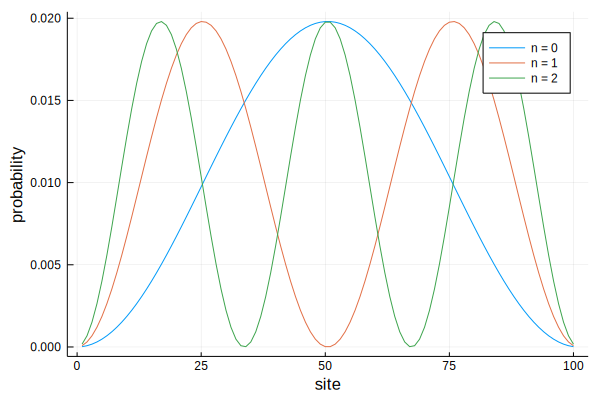

In [56]:
using Plots

show_n_states = 3

p = plot()
for i in 1:show_n_states
    plot!(p, abs2.(vecs[:,i]), xlab="site", ylab="probability", lab="n = $(i-1)")
end
p

In [63]:
using Arpack
λ, evs = eigs(Hsparse);
λ

6-element Array{Float64,1}:
 -2.499032564583962
 -2.4961311942671913
 -2.491298695938047
 -2.4845397447265563
 -2.4758608794815236
 -2.4652704964445262

In [68]:
using ArnoldiMethod
decomp, history = partialschur(Hsparse)
λ, evs = partialeigen(decomp);
λ

┌ Info: Precompiling ArnoldiMethod [ec485272-7323-5ecc-a04f-4719b315124d]
└ @ Base loading.jl:1260


6-element Array{Float64,1}:
 -2.499032564583976
 -2.4961311942671798
 -2.4912986959380516
 -2.4845397447265527
 -2.4758608794815373
 -2.4652704964445245

In [69]:
using KrylovKit
λ, evs = eigsolve(Hsparse);
λ

┌ Info: Precompiling KrylovKit [0b1a1467-8014-51b9-945f-bf0ae24f4b77]
└ @ Base loading.jl:1260


1-element Array{Float64,1}:
 -2.4990325645839766